In [1]:
#安裝套件
!pip install requests
!pip install feedparser
!pip install lxml
!pip install jieba
!pip install wordcloud

In [1]:
#載入需要的library
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

In [2]:
#指定辭典檔
jieba.set_dictionary('./mydict/dict.txt.big')
#加入自定義辭典
jieba.load_userdict('./mydict/mydict.txt')

Building prefix dict from C:\Users\leavi\Desktop\catcher_nlp\mydict\dict.txt.big ...
Loading model from cache C:\Users\leavi\AppData\Local\Temp\jieba.ue81af2ce4832b1549caa38b1b6fa9b38.cache
Loading model cost 1.128 seconds.
Prefix dict has been built successfully.


In [3]:
#開檔
fileAllLines = []
#避免檔案過大造成記憶體不足使用 with open 及 read()控制讀取數量
with open('./file/healthy_all.txt','r',encoding="utf-8") as fileLine:
    for line in iter(lambda: fileLine.read(1024), ''):
        #print(line)
        fileAllLines.append(line)
new_line = ' '.join(fileAllLines)
#new_line

In [4]:
#加入stop word
with open(file='./mydict/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
    
stop_words.append('\n')  ## 文章中有許多分行符號，這邊加入停用字中，可以把它拿掉
stop_words.append('\n\n')
#stop_words #查看停止字是否都有剔除

In [5]:
#進行匯入停止字的分詞
start_time = time.time()

seg_stop_words_list = []
seg_words_list = jieba.lcut(new_line)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
#seg_stop_words_list

print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 244.19966506958008 seconds ---


In [6]:
#載入繪圖相關的library
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

C:\Users\leavi\anaconda3\envs\catcher_nlp\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [7]:
#準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter #查看詞頻統計

(-0.5, 399.5, 199.5, -0.5)

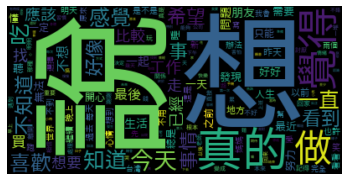

In [8]:
#用有處理stop words的斷詞跑文字雲
wordcloud = WordCloud(font_path='./font/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show() #查看文字雲

In [9]:
#用pandas建立dataframe
seg_df = pd.DataFrame(seg_stop_words_list, columns=['seg_word'])
#seg_df

In [10]:
#進行排序，查看詞頻最高的前20個詞
seg_df['count'] = 1
seg_freq_df = seg_df.groupby('seg_word').sum()
#seg_freq_df
print(seg_freq_df.sort_values(by=['count'],ascending=False).head(20))

          count
seg_word       
說         25742
想         18544
真的        17091
覺得        14032
做         11493
今天        10641
知道         9194
吃          9144
喜歡         8102
一直         7781
感覺         7507
不知道        7063
希望         6761
事          6636
事情         6626
看到         6349
好像         5752
應該         5726
工作         5630
已經         5534


In [16]:
#將詞頻統計的dataframe存成csv檔
df_seg=seg_freq_df.sort_values(by=['count'],ascending=False)
df_seg.to_csv('frequencyNormal.csv',index=1)